In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

# Function to convert coordinates to kilometers
def convert_to_km(x, y, min_x, min_y):
    km_per_degree = 111
    x_km = (x - min_x) * km_per_degree
    y_km = (y - min_y) * km_per_degree * math.cos(math.radians(x))
    return x_km, y_km

# List of folders to process
folders = ['0', '1', '2']

for folder in folders:
    # Define the path to the Coordinates.csv file
    file_path = os.path.join(folder, 'Coordinates.csv')
    
    # Read the CSV file
    df = pd.read_csv(file_path, delimiter=';')
    
    # Extract x and y coordinates
    x = df['x'].values
    y = df['y'].values
    
    # Find the minimum x and y values
    min_x = min(x)
    min_y = min(y)
    
    # Convert coordinates to kilometers
    x_km, y_km = zip(*[convert_to_km(xi, yi, min_x, min_y) for xi, yi in zip(x, y)])
    
    # Create a new DataFrame with converted coordinates
    df_km = pd.DataFrame({'x': x_km, 'y': y_km})
    
    # Save the new DataFrame to a CSV file in the corresponding folder
    output_file_path = os.path.join(folder, 'ps.csv')
    df_km.to_csv(output_file_path, index=False, sep=';')
    
    # Plot the points
    plt.figure()
    plt.scatter(x_km, y_km)
    plt.xlabel('X (km)')
    plt.ylabel('Y (km)')
    plt.title(f'Coordinates in Kilometers for Folder {folder}')
    plt.grid(True)
    
    # Save the plot as an image in the corresponding folder
    plot_file_path = os.path.join(folder, 'coordinates_plot.png')
    plt.savefig(plot_file_path)
    plt.close()

print("Processing complete. Check the folders for output files.")

Processing complete. Check the folders for output files.


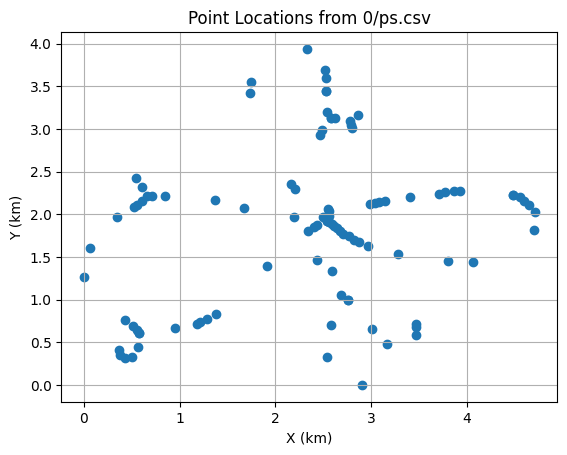

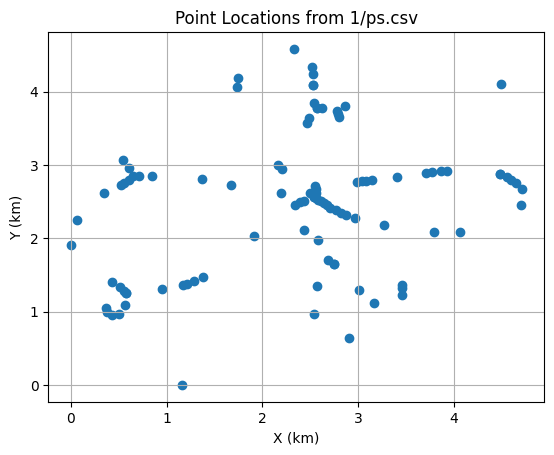

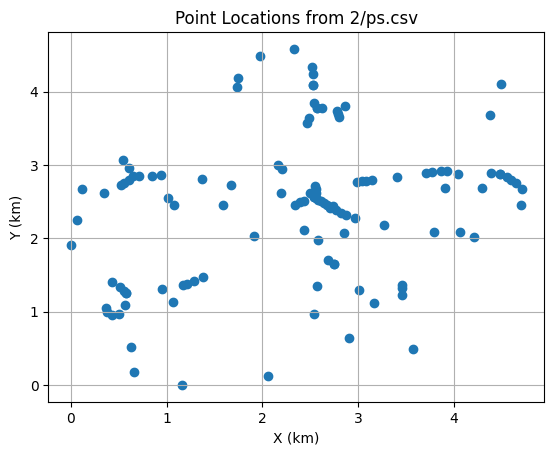

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of folders to process
folders = ['0', '1', '2']

for folder in folders:
    # Define the path to the ps.csv file
    file_path = os.path.join(folder, 'ps.csv')
    
    # Read the CSV file
    df = pd.read_csv(file_path, delimiter=';')
    
    # Extract x and y coordinates
    x = df['x'].values
    y = df['y'].values
    
    # Create a new plot for each folder
    plt.figure()
    plt.scatter(x, y)
    plt.xlabel('X (km)')
    plt.ylabel('Y (km)')
    plt.title(f'Point Locations from {folder}/ps.csv')
    plt.grid(True)
    
    # Show the plot
    plt.show()

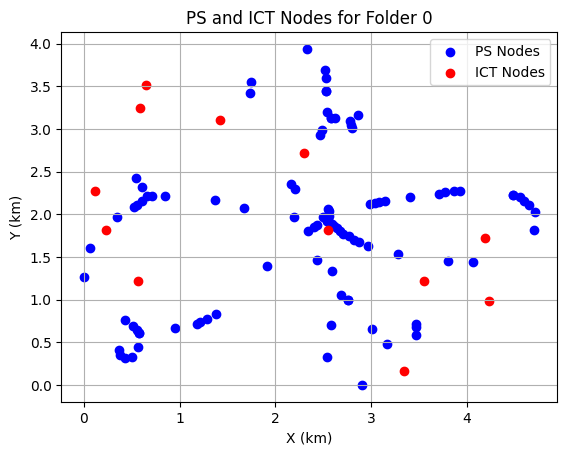

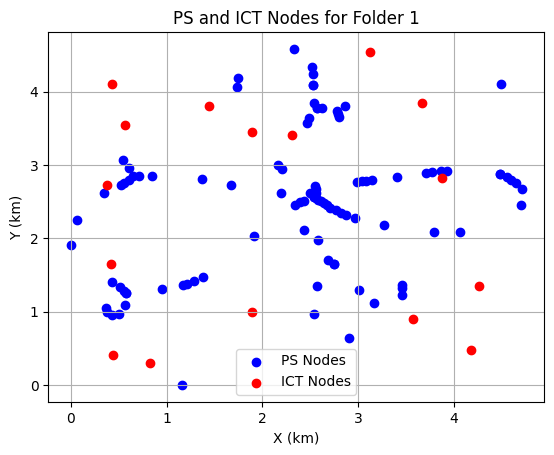

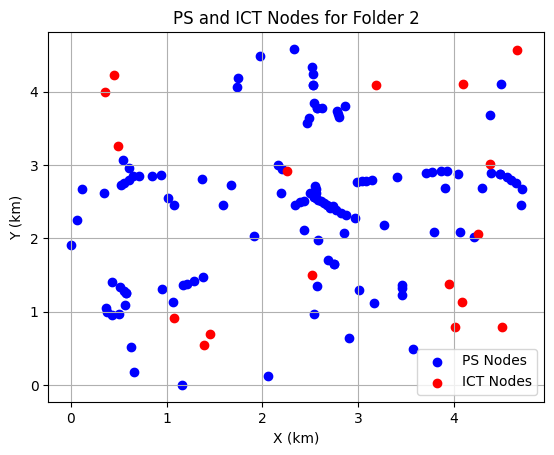

ICT node generation complete. Check the folders for output files.


In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the scenario
scenario = "rural"

# Statistics for the rural scenario
ict_density_stats = {"rural_min": 0.138217, "rural_max": 8.403361}
ict_range_stats = {"rural_25": 2.6825, "rural_75": 14.49575}
ps_distance_stats = {"rural_median": 2.225319}

# Function to determine the ICT node amount
def determine_ict_amount(area):
    density = np.random.uniform(ict_density_stats[scenario + "_min"], ict_density_stats[scenario + "_max"])
    return round((density / 10) * area)

# Function to determine the ICT ranges
def determine_ict_range(ict_node_amount):
    return np.random.uniform(ict_range_stats[scenario + "_25"], ict_range_stats[scenario + "_75"], ict_node_amount)

# Function to generate ICT nodes
def generate_ict_nodes(ps_coords, ict_node_amount):
    min_x, min_y = ps_coords.min(axis=0)
    max_x, max_y = ps_coords.max(axis=0)
    ict_nodes = np.column_stack((
        np.random.uniform(min_x, max_x, ict_node_amount),
        np.random.uniform(min_y, max_y, ict_node_amount)
    ))
    return ict_nodes

# Function to calculate the area
def calculate_area(ps_coords):
    min_x, min_y = ps_coords.min(axis=0)
    max_x, max_y = ps_coords.max(axis=0)
    x_distance = max_x - min_x
    y_distance = max_y - min_y
    return x_distance * y_distance

# List of folders to process
folders = ['0', '1', '2']

for folder in folders:
    # Read the ps.csv file
    file_path = os.path.join(folder, 'ps.csv')
    ps_df = pd.read_csv(file_path, delimiter=';')
    ps_coords = ps_df[['x', 'y']].values
    
    # Calculate the area of the PS model
    area = calculate_area(ps_coords)
    
    # Determine the number of ICT nodes
    ict_node_amount = determine_ict_amount(area)
    
    # Generate ICT nodes
    ict_nodes = generate_ict_nodes(ps_coords, ict_node_amount)
    
    # Determine ICT ranges
    ict_ranges = determine_ict_range(ict_node_amount)
    
    # Save the ICT nodes to a CSV file
    ict_df = pd.DataFrame(ict_nodes, columns=['x', 'y'])
    ict_df.to_csv(os.path.join(folder, 'ict.csv'), index=False, sep=';')
    
    # Plot the PS and ICT nodes
    plt.figure()
    plt.scatter(ps_coords[:, 0], ps_coords[:, 1], color='blue', label='PS Nodes')
    plt.scatter(ict_nodes[:, 0], ict_nodes[:, 1], color='red', label='ICT Nodes')
    plt.xlabel('X (km)')
    plt.ylabel('Y (km)')
    plt.title(f'PS and ICT Nodes for Folder {folder}')
    plt.legend()
    plt.grid(True)
    
    # Display the plot in the Jupyter notebook
    plt.show()

print("ICT node generation complete. Check the folders for output files.")

Lowering fitness threshold, now is at 70%
Lowering fitness threshold, now is at 65%


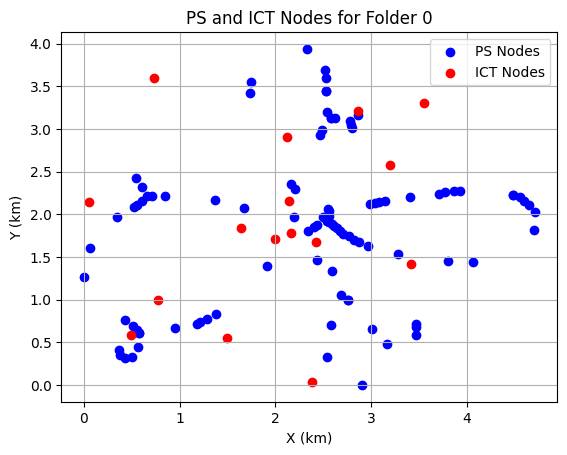

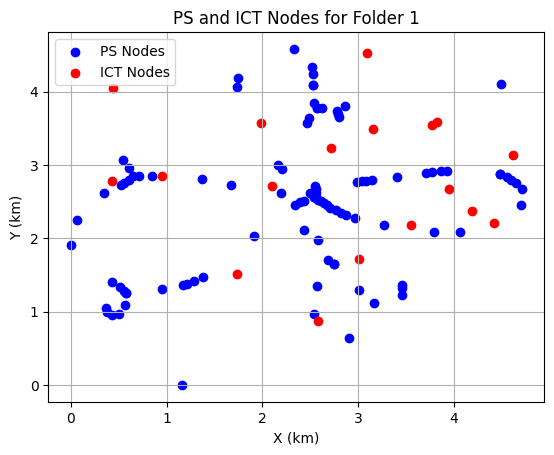

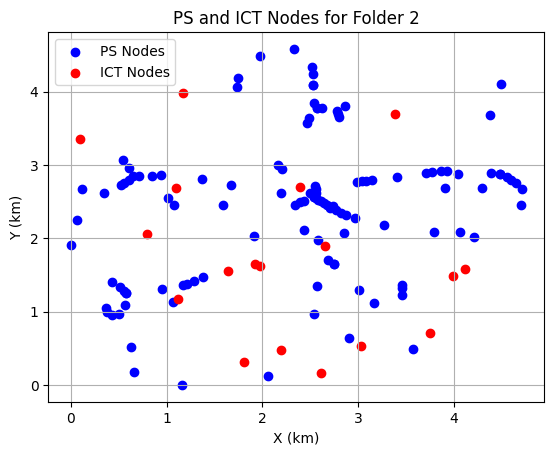

ICT node generation complete. Check the folders for output files.


In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from haversine import haversine

# Define the scenario
scenario = "rural"

# Fitness parameters
overall_fitness_threshold = 75
lower_fitness_threshold = True
fitness_threshold_retries = 100

# Statistics for the rural scenario
ict_density_stats = {"rural_min": 0.138217, "rural_max": 8.403361}
ict_range_stats = {"rural_25": 2.6825, "rural_75": 14.49575}
ps_distance_stats = {"rural_min": 0.002491, "rural_25": 1.186067, "rural_median": 2.225319, "rural_75": 3.653565, "rural_max": 11.293329}

# Function to calculate the area
def calculate_area(ps_coords):
    min_x, min_y = ps_coords.min(axis=0)
    max_x, max_y = ps_coords.max(axis=0)
    x_distance = max_x - min_x
    y_distance = max_y - min_y
    return x_distance * y_distance

# Function to determine the ICT node amount using rural_max
def determine_ict_amount(area):
    density = ict_density_stats[scenario + "_max"]
    return round((density / 10) * area)

# Function to determine the ICT ranges
def determine_ict_range(ict_node_amount):
    return np.random.uniform(ict_range_stats[scenario + "_25"], ict_range_stats[scenario + "_75"], ict_node_amount)

# Function to generate ICT nodes
def generate_ict_nodes(ps_coords, ict_node_amount):
    min_x, min_y = ps_coords.min(axis=0)
    max_x, max_y = ps_coords.max(axis=0)
    ict_nodes = np.column_stack((
        np.random.uniform(min_x, max_x, ict_node_amount),
        np.random.uniform(min_y, max_y, ict_node_amount)
    ))
    return ict_nodes

# Function to calculate fitness
def calculate_fitness(ict_nodes, ps_coords, ict_ranges, area):
    # Calculate density fitness
    actual_density = len(ict_nodes) / area * 10
    density_mean = np.mean([ict_density_stats[scenario + "_min"], ict_density_stats[scenario + "_max"]])
    density_fitness = (1 - abs(actual_density - density_mean) / density_mean) * 100 if density_mean != 0 else 0
    
    # Calculate range fitness
    actual_range = np.mean(ict_ranges)
    range_mean = np.mean([ict_range_stats[scenario + "_25"], ict_range_stats[scenario + "_75"]])
    range_fitness = (1 - abs(actual_range - range_mean) / range_mean) * 100 if range_mean != 0 else 0
    
    # Calculate distance fitness
    ps_distances = [haversine(ps_coords[i], ps_coords[j]) for i in range(len(ps_coords)) for j in range(i + 1, len(ps_coords))]
    ict_distances = [haversine(ict_nodes[i], ict_nodes[j]) for i in range(len(ict_nodes)) for j in range(i + 1, len(ict_nodes))]
    
    actual_ps_distance = np.mean(ps_distances)
    actual_ict_distance = np.mean(ict_distances)
    
    distance_fitness = (1 - abs(actual_ict_distance - actual_ps_distance) / actual_ps_distance) * 100 if actual_ps_distance != 0 else 0
    
    # Calculate overall fitness
    overall_fitness = (density_fitness + range_fitness + distance_fitness) / 3
    return overall_fitness

# List of folders to process
folders = ['0', '1', '2']

for folder in folders:
    # Read the ps.csv file
    file_path = os.path.join(folder, 'ps.csv')
    ps_df = pd.read_csv(file_path, delimiter=';')
    ps_coords = ps_df[['x', 'y']].values
    
    # Calculate the area of the PS model
    area = calculate_area(ps_coords)
    
    fitness_aggregate, i = 0, 0
    
    while fitness_aggregate < overall_fitness_threshold:
        # Determine the number of ICT nodes
        ict_node_amount = determine_ict_amount(area)
        
        # Generate ICT nodes
        ict_nodes = generate_ict_nodes(ps_coords, ict_node_amount)
        
        # Determine ICT ranges
        ict_ranges = determine_ict_range(ict_node_amount)
        
        # Calculate fitness
        fitness_aggregate = calculate_fitness(ict_nodes, ps_coords, ict_ranges, area)
        
        i += 1
        if i == fitness_threshold_retries and lower_fitness_threshold:
            i = 0
            overall_fitness_threshold -= 5
            print(f"Lowering fitness threshold, now is at {overall_fitness_threshold}%")
        if i == fitness_threshold_retries and not lower_fitness_threshold:
            print("Could not find a scenario matching the specified fitness value and lowering the fitness value is set to False. Aborting execution.")
            break
    
    # Save the ICT nodes to a CSV file
    ict_df = pd.DataFrame(ict_nodes, columns=['x', 'y'])
    ict_df.to_csv(os.path.join(folder, 'ict.csv'), index=False, sep=';')
    
    # Plot the PS and ICT nodes
    plt.figure()
    plt.scatter(ps_coords[:, 0], ps_coords[:, 1], color='blue', label='PS Nodes')
    plt.scatter(ict_nodes[:, 0], ict_nodes[:, 1], color='red', label='ICT Nodes')
    plt.xlabel('X (km)')
    plt.ylabel('Y (km)')
    plt.title(f'PS and ICT Nodes for Folder {folder}')
    plt.legend()
    plt.grid(True)
    
    # Display the plot in the Jupyter notebook
    plt.show()

print("ICT node generation complete. Check the folders for output files.")

In [11]:
import os
import json
import pandas as pd

# Function to generate JSON from CSV files
def generate_json_from_csv(folder, radius_drones_bs=0.4):
    # Read the ps.csv file
    ps_file_path = os.path.join(folder, 'ps.csv')
    ps_df = pd.read_csv(ps_file_path, delimiter=';')
    ps_coords = ps_df[['x', 'y']].values.tolist()

    # Read the ict.csv file
    ict_file_path = os.path.join(folder, 'ict.csv')
    ict_df = pd.read_csv(ict_file_path, delimiter=';')
    ict_coords = ict_df[['x', 'y']].values.tolist()

    # Create the JSON structure
    data = {
        "radius_drones_bs": radius_drones_bs,
        "base_stations": ict_coords,
        "power_stations": ps_coords,
        "obstacles": []
    }

    # Define the JSON file path
    json_file_path = os.path.join(folder, 'data.json')

    # Write the JSON file
    with open(json_file_path, 'w') as json_file:
        json.dump(data, json_file, indent=2)

    print(f"JSON data has been written to {json_file_path}")

# List of folders to process
folders = ['0', '1', '2']

for folder in folders:
    generate_json_from_csv(folder)

JSON data has been written to 0\data.json
JSON data has been written to 1\data.json
JSON data has been written to 2\data.json
